# **Panel Tracking**
orients the panels towards the sun as much as possible in order to maximize the cross section presented towards incoming beam irradiance.

In [10]:
from pvlib import solarposition, tracking
import pandas as pd
import matplotlib.pyplot as plt

tz = 'Europe/Berlin'
lat, lon = 51.401944, 10.737222

times = pd.date_range('2025-06-21', '2025-06-22', freq='5min',
                      tz=tz)
solpos = solarposition.get_solarposition(times, lat, lon)
solpos

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2025-06-21 00:00:00+02:00,103.183296,103.183296,-13.183296,-13.183296,341.483650,-1.726341
2025-06-21 00:05:00+02:00,103.423457,103.423457,-13.423457,-13.423457,342.635810,-1.727102
2025-06-21 00:10:00+02:00,103.648625,103.648625,-13.648625,-13.648625,343.792282,-1.727863
2025-06-21 00:15:00+02:00,103.858655,103.858655,-13.858655,-13.858655,344.952834,-1.728624
2025-06-21 00:20:00+02:00,104.053408,104.053408,-14.053408,-14.053408,346.117218,-1.729385
...,...,...,...,...,...,...
2025-06-21 23:40:00+02:00,102.064444,102.064444,-12.064444,-12.064444,336.872299,-1.942356
2025-06-21 23:45:00+02:00,102.363610,102.363610,-12.363610,-12.363610,338.004917,-1.943116
2025-06-21 23:50:00+02:00,102.648452,102.648452,-12.648452,-12.648452,339.142664,-1.943876
2025-06-21 23:55:00+02:00,102.918795,102.918795,-12.918795,-12.918795,340.285358,-1.944636


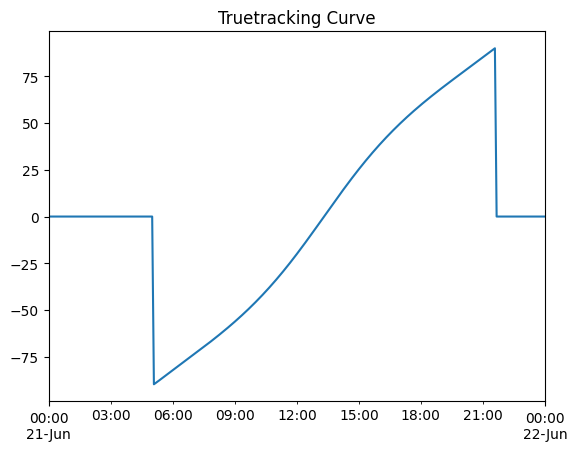

In [11]:
truetracking_angles = tracking.singleaxis(
    apparent_zenith=solpos['apparent_zenith'],
    apparent_azimuth=solpos['azimuth'],
    axis_tilt=0,
    axis_azimuth=180,
    max_angle=90,
    backtrack=False,  # for true-tracking
    gcr=0.5)  # irrelevant for true-tracking

truetracking_position = truetracking_angles['tracker_theta'].fillna(0)
truetracking_position.plot(title='Truetracking Curve')

plt.show()

y-axis is elevation
also possible in dicontinuous manner:
https://pvlib-python.readthedocs.io/en/stable/gallery/solar-tracking/plot_discontinuous_tracking.html